#### Data comes from Kaggle https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

- StudentID - A unique identifier assigned to each student (1001 to 3392).
- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Import library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

#### Import dataset

In [22]:
df = pd.read_csv('Student_performance_data _.csv')
df = df.drop(columns=['StudentID'])
df['GradeClass'] = df['GradeClass'].astype(int)
df.rename(columns = {'ParentalEducation': 'ParentEduc', 'Volunteering': 'Volunt', 'StudyTimeWeekly': 
                     'StudyTimeWk', 'GradeClass': 'Grade', 'Extracurricular': 'Extracurr'}, inplace=True)
df

,Age,Gender,Ethnicity,ParentEduc,StudyTimeWk,Absences,Tutoring,ParentalSupport,Extracurr,Sports,Music,Volunt,GPA,Grade
0,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


In [23]:
df['Grade'].value_counts() 
#there is little bit of imbalanced dataset

4    1211
3     414
2     391
1     269
0     107
Name: Grade, dtype: int64

<AxesSubplot:xlabel='StudyTimeWk', ylabel='GPA'>

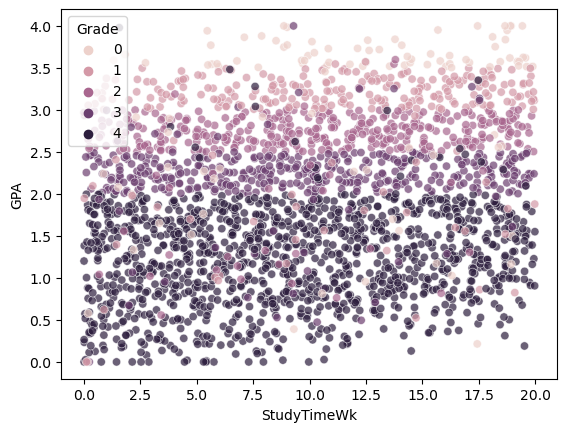

In [24]:
sns.scatterplot(data = df, x='StudyTimeWk', y='GPA', hue='Grade', alpha=0.7) 

#### Separate X features & y labels

In [25]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

#### SPLIT into Training & Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Feature Scaling (Standard Scaler)

In [27]:
from sklearn.preprocessing import StandardScaler # not a bad idea to scale
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### TRAIN the model

In [28]:
from sklearn.svm import SVC  # Support Vector Classifier (with Soft Margins)
model = SVC(kernel='rbf', C=1.0) #default values #SVM use kernels to project data to higher dimension to separate the data
model.fit(scaled_X_train, y_train)

SVC()

#### TEST the model

In [29]:
y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
new_df.sample(5)

,y_test,y_pred
78,4,4
467,4,4
64,3,3
281,3,3
53,2,2


#### EVAULATE the model

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# model.coef_ ----note only available on linear kernel

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

#OK this is not a bad model.

Accuracy Score: 0.7807933194154488
Precision Score: 0.7914166544305572
Recall Score: 0.7807933194154488
F1 Score: 0.7616106761153967


In [32]:
import warnings
warnings.filterwarnings('ignore')

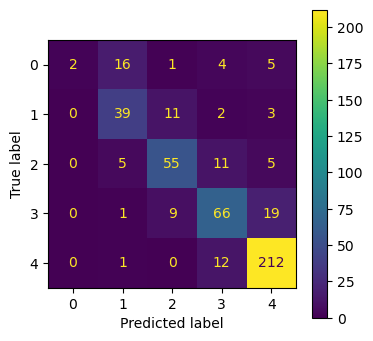

In [33]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, scaled_X_test, y_test).figure_.set_size_inches(4, 4)

In [34]:
confusion_matrix(y_test, y_pred)

array([[  2,  16,   1,   4,   5],
       [  0,  39,  11,   2,   3],
       [  0,   5,  55,  11,   5],
       [  0,   1,   9,  66,  19],
       [  0,   1,   0,  12, 212]], dtype=int64)

#### Visualize the model

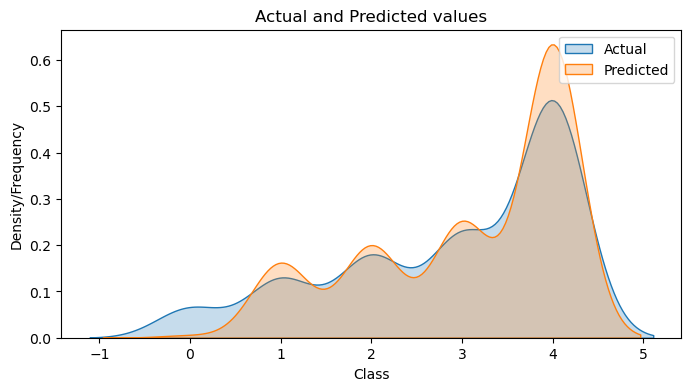

In [35]:
plt.figure(figsize=(8, 4))

sns.kdeplot(y_test, label='Actual', shade=True)
sns.kdeplot(y_pred, label='Predicted', shade=True)

plt.title('Actual and Predicted values')
plt.xlabel('Class')
plt.ylabel('Density/Frequency')
plt.legend()
plt.show()

# y_test & y_pred mostly overlap, but definitely noticeable difference, thus why 61% accuracy

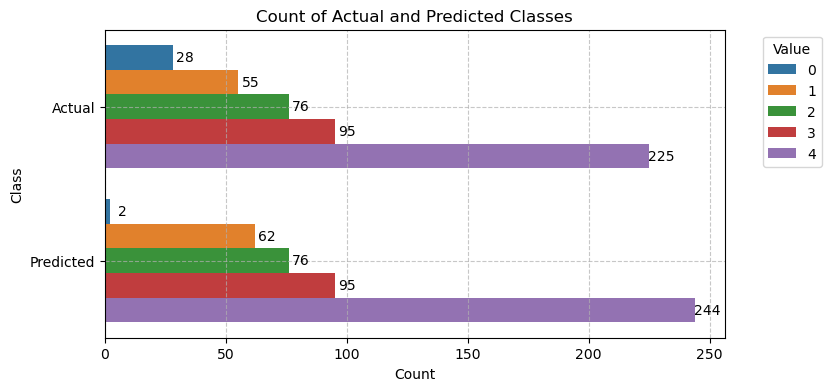

In [36]:
# Combine y_test and y_pred into a single DataFrame
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the counts of each class
plt.figure(figsize=(8, 4))
plot = sns.countplot(y='variable', hue='value', data=pd.melt(comparison_df))

# Add counts on top of the bars
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'), 
                  (p.get_width(), p.get_y() + p.get_height() / 2.), 
                  ha = 'center', va = 'center', 
                  xytext = (9, 0), 
                  textcoords = 'offset points')

plt.legend(title='Value', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('Count of Actual and Predicted Classes')
plt.ylabel('Class')
plt.xlabel('Count')
plt.show()

#### Predict new student

In [37]:
print(model.predict(scaler.transform([[18, 1, 0, 0, 14, 2, 0, 0, 0, 0, 0, 0, 3.4 ]])))
# if a student is 18 years old, is female, caucasian, parents have no education, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, no parantal support, no extracurricular, no sports, no music, no volunteering, and has GPA of 3.2
# then she will get a class 2 which is C

[2]


In [42]:
print(model.predict(scaler.transform([[18, 1, 0, 3 , 14, 2, 0, 1, 1, 0, 0, 0, 3.0 ]])))
# if a student is 18 years old, is female, caucasian, parents have no Bachelors, spends 14 hrs weekly studying, 2 times number of absences, 
# no tutoring, low parantal support, yes to extracurricular, no sports, no music, no volunteering, and has GPA of 3.0
# then she will get an class 2 which is C

[2]


- Age - The age of the students ranges from 15 to 18 years.
- Gender - Gender of the students, where 0 represents Male and 1 represents Female.
- Ethnicity - The ethnicity of the students: 0: Caucasian, 1: African American, 2: Asian, 3: Other
- ParentalEducation - 0: None, 1: High School, 2: Some College, 3: Bachelor's, 4: Higher, 
- StudyTimeWeekly - Weekly study time in hours, ranging from 0 to 20.
- Absences - Number of absences during the school year, ranging from 0 to 30.
- Tutoring - Tutoring status, where 0 indicates No and 1 indicates Yes.
- ParentalSupport - 0: None, 1: Low, 2: Moderate, 3: High, 4: Very High
- Extracurricular - Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
- Sports - Participation in sports, where 0 indicates No and 1 indicates Yes.
- Music - Participation in music activities, where 0 indicates No and 1 indicates Yes.
- Volunteering - Participation in volunteering, where 0 indicates No and 1 indicates Yes.
- GPA - Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
- Target Variable Grade Class - 0: 'A' (GPA >= 3.5), 1: 'B' (3.0 <= GPA < 3.5), 2: 'C' (2.5 <= GPA < 3.0), 3: 'D' (2.0 <= GPA < 2.5), 4: 'F' (GPA < 2.0)

#### Grid Search with Cross Validation

OK so what is a good kernel or the number of C? Lets do Grid Search let the computer do the work instead of spending time and testing bunch.

In [38]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C': [0.01, 0.1, 1], 
             'kernel':['linear', 'rbf', 'linear']}

grid = GridSearchCV(svm, param_grid)
grid.fit(X, y)
grid.best_params_

#interesting it picked linear to be better than rbf. Lets try and see at the results

{'C': 1, 'kernel': 'linear'}

In [39]:
from sklearn.svm import SVC  
model = SVC(kernel='linear', C=1.0) 
model.fit(scaled_X_train, y_train)

y_pred = model.predict(scaled_X_test)
new_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f"Precision Score: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall Score: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

Accuracy Score: 0.8475991649269311
Precision Score: 0.7992206620300863
Recall Score: 0.8475991649269311
F1 Score: 0.8218048983612141


In [40]:
# results from first model
# Accuracy Score: 0.7807933194154488
#Precision Score: 0.7914166544305572
# Recall Score: 0.7807933194154488
# F1 Score: 0.7616106761153967

# well it definitely made the accurate better, precision is slightly better, and the recall is better
# OK this is why we do Cross Validation as it can give us better metrics to use

In [41]:
# see 3.1 for different kernels